In [9]:
import csv
import numpy as np
import xarray as xr

In [10]:
datadir = '/home/fedef/Research/abstractsepapers/papers/DREAM/data/'

### GDP from World Bank data

In [11]:
with open(datadir + 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)

    rows = []
    for row in reader:
        rows.append(row)

rows = rows[5:]

In [12]:
country = [ro[0] for ro in rows]
ro_ok = np.where(np.array(country) == 'World')[0][0]
row_wld = rows[ro_ok]

In [13]:
gdp = np.array(row_wld[4:-1], dtype = float)
years = np.arange(1960, 2023)

In [14]:
gdp = xr.DataArray(gdp, dims = ["year"], coords = {"year": np.arange(1960, 2023)})

In [15]:
import lib_ecofun as lef

In [16]:
gdp = lef.get_wb_gdp_data()

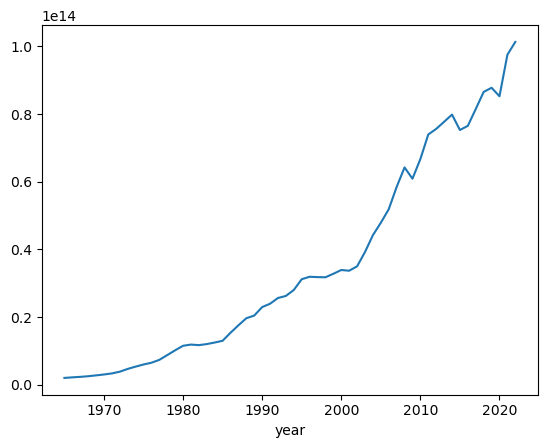

In [35]:
gdp.sel(year = slice(1965, None)).plot()

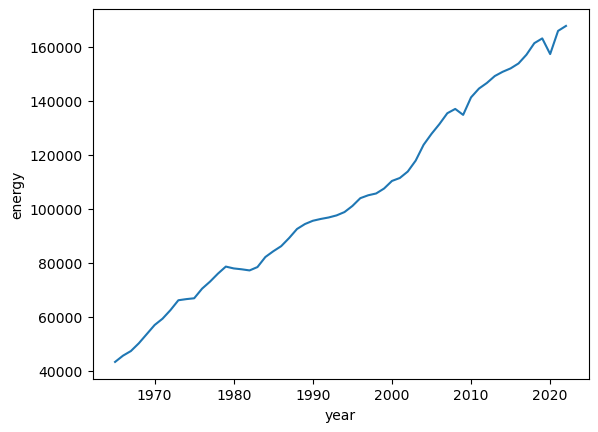

In [34]:
ene.plot()

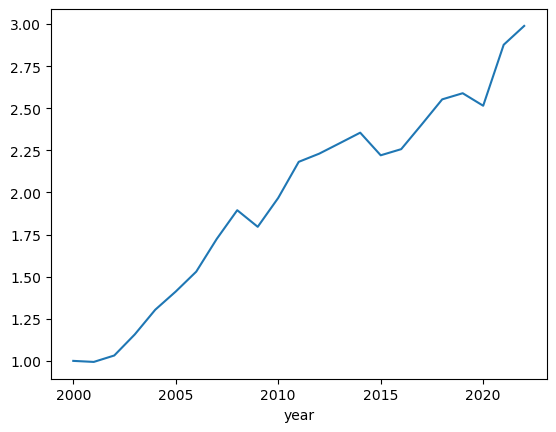

In [17]:
(gdp.sel(year = slice(2000, None))/gdp.sel(year = 2000)).plot()

In [18]:
gdp.sel(year = 2022)/gdp.sel(year = 2000)/23

<xarray.DataArray ()>
array(0.12995866)

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

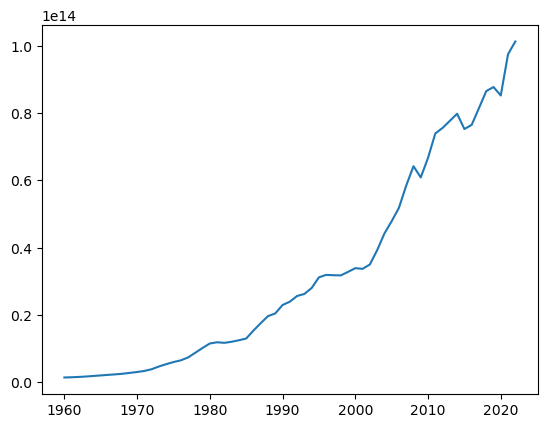

In [20]:
plt.plot(years, gdp)

### CO2 emissions

In [21]:
keys = ['year', 'population', 'gdp', 'co2', 'land_use_change_co2', 'primary_energy_consumption']

In [22]:
with open(datadir + 'owid-co2-data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    rows_wld = []
    for row in reader:
        if row['country'] == 'World':
            rows_wld.append(row)

codict = dict()
for ke in keys:
    if ke not in codict:
        codict[ke] = []
    
    codict[ke] = np.array([ro[ke] if ro[ke] != '' else np.nan for ro in rows_wld], dtype = float)

In [23]:
for ke in rows_wld[0].keys(): print(ke)

country
year
iso_code
population
gdp
cement_co2
cement_co2_per_capita
co2
co2_growth_abs
co2_growth_prct
co2_including_luc
co2_including_luc_growth_abs
co2_including_luc_growth_prct
co2_including_luc_per_capita
co2_including_luc_per_gdp
co2_including_luc_per_unit_energy
co2_per_capita
co2_per_gdp
co2_per_unit_energy
coal_co2
coal_co2_per_capita
consumption_co2
consumption_co2_per_capita
consumption_co2_per_gdp
cumulative_cement_co2
cumulative_co2
cumulative_co2_including_luc
cumulative_coal_co2
cumulative_flaring_co2
cumulative_gas_co2
cumulative_luc_co2
cumulative_oil_co2
cumulative_other_co2
energy_per_capita
energy_per_gdp
flaring_co2
flaring_co2_per_capita
gas_co2
gas_co2_per_capita
ghg_excluding_lucf_per_capita
ghg_per_capita
land_use_change_co2
land_use_change_co2_per_capita
methane
methane_per_capita
nitrous_oxide
nitrous_oxide_per_capita
oil_co2
oil_co2_per_capita
other_co2_per_capita
other_industry_co2
primary_energy_consumption
share_global_cement_co2
share_global_co2
share_g

In [24]:
pop = xr.DataArray(codict['population'], name = 'population', dims = ["year"], coords = {"year": codict['year']})
#gdp = xr.DataArray(codict['gdp'], name = 'gdp', dims = ["year"], coords = {"year": codict['year']})
ene = xr.DataArray(codict['primary_energy_consumption'], name = 'energy', dims = ["year"], coords = {"year": codict['year']})


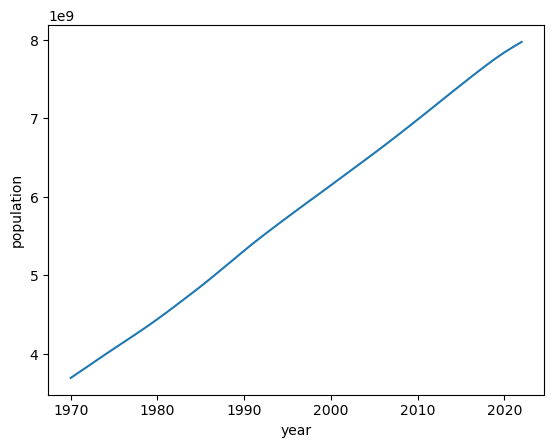

In [25]:
pop.sel(year = slice(1970, None)).plot()

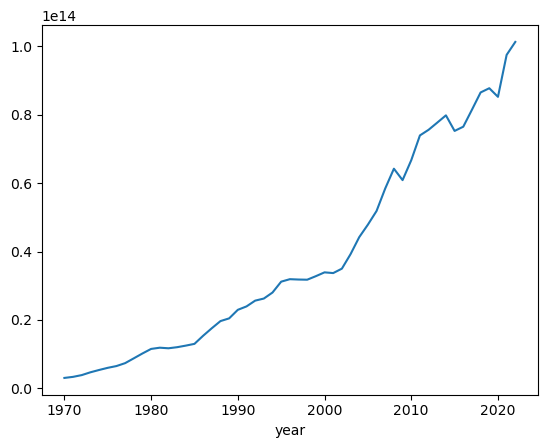

In [26]:
gdp.sel(year = slice(1970, None)).plot()

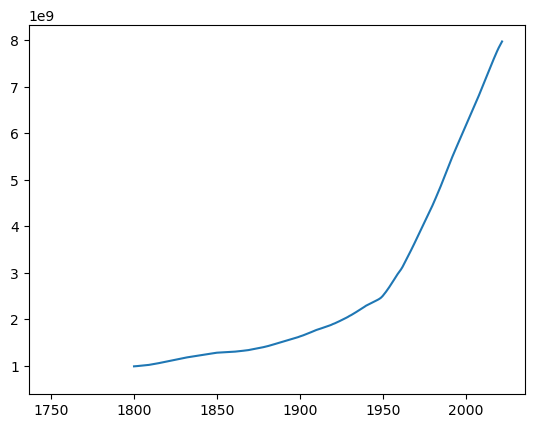

In [27]:
plt.plot(codict['year'], codict['population'])

In [28]:
co2 = xr.DataArray(codict['co2']/1e3, name = 'co2', dims = ["year"], coords = {"year": codict['year']})


In [29]:
co2.to_netcdf('co2_emiss_1750-2022.nc')

In [53]:
ene

<xarray.DataArray 'energy' (year: 273)>
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
...
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
        43307.871,  45623.359,  47341.25 ,  50203.391,  53570.32 ,
        56984.879,  59321.215,  62498.727,  66152.344,  66572.547,
        66886.82 ,  70454.328,  73046.031,  76009.5  ,  78627.852,
        77946.867,  77624.555,  77205.68 ,  78453.688,  82178.641,
        84306.375,  86197.391,  89201.516,  92560.117,  94387.016,
        95604.477,  96274.602,  96821.883,  97590.492,  98825.789,
       101077.875, 103972.078, 105047.641, 105711.148, 107538.664,
       110356.539, 111457.32 , 113842.336, 117889.008, 123741.633,
       127801.188, 131415.594, 135446.25 , 137036.109, 134829.016,
       141325.547, 144578.906, 146655.703, 149220.312, 150798.406,
       152054.062, 153884.578, 157110.156, 161402.734, 163163.344,
       157357.797, 165946.156, 167787.672])
Coordinates:
  * year     (year) float64 1.75e+03 1.751e+03 1.752e+03 ... 2.021e+03 2.022e+03

In [57]:
ene = ene.dropna('year')

In [62]:
ene.to_netcdf('Etot_hist_1965-2022.nc')

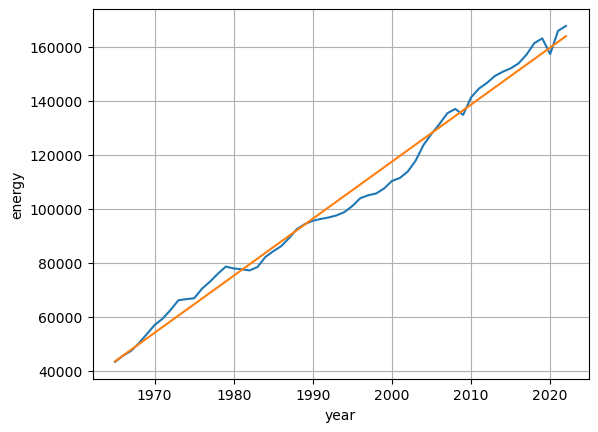

In [60]:
ene.plot()
plt.plot(ene.year, intercept + slope * ene.year)
plt.grid()

In [43]:
ene.dropna()

<bound method DataArray.dropna of <xarray.DataArray 'energy' (year: 273)>
array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 

In [44]:
from scipy import stats

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(ene.sel(year = slice(1970, None)).year, ene.sel(year = slice(1970, None)))

In [48]:
slope/ene.sel(year = 2022)

<xarray.DataArray 'energy' ()>
array(0.01259405)
Coordinates:
    year     float64 2.022e+03

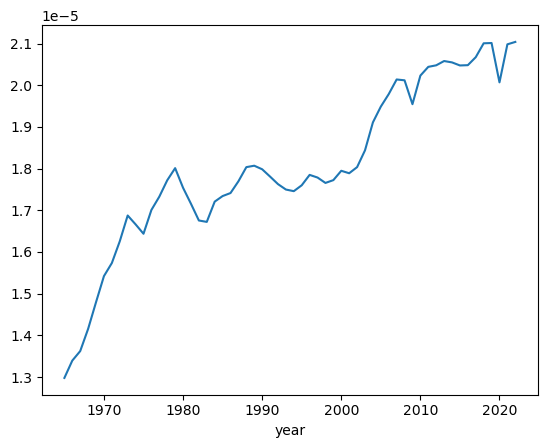

In [31]:
(ene/pop).plot()

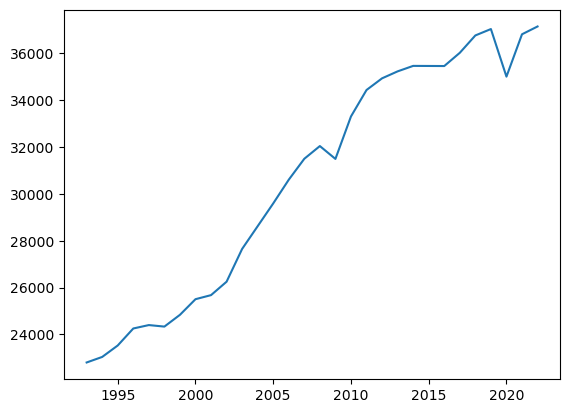

In [32]:
plt.plot(codict['year'][-30:], codict['co2'][-30:])

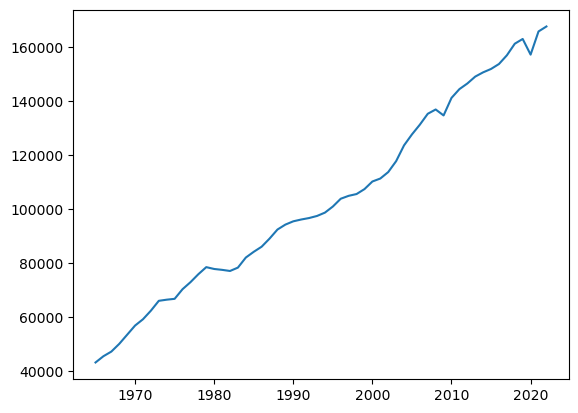

In [33]:
plt.plot(codict['year'], codict['primary_energy_consumption'])

In [19]:
np.mean(np.diff(codict['primary_energy_consumption'][-8:])/codict['primary_energy_consumption'][-8:-1])

0.014474899025088172

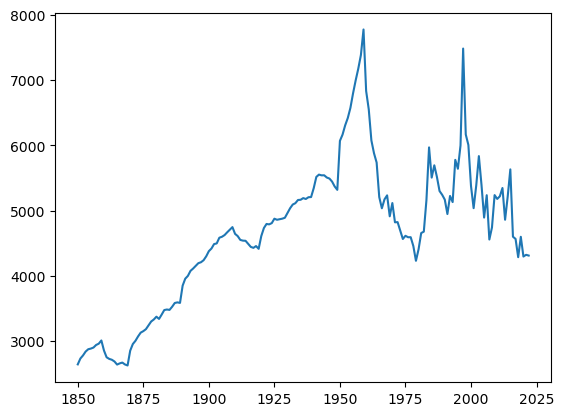

In [20]:
plt.plot(codict['year'], codict['land_use_change_co2'])

In [21]:
codict['year'][~np.isnan(codict['land_use_change_co2'])]

array([1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857., 1858.,
       1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866., 1867.,
       1868., 1869., 1870., 1871., 1872., 1873., 1874., 1875., 1876.,
       1877., 1878., 1879., 1880., 1881., 1882., 1883., 1884., 1885.,
       1886., 1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894.,
       1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903.,
       1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912.,
       1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921.,
       1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977.,

### Trying to build something

In [22]:
2022-1965

57

In [23]:
vars = dict()

vars['gdp'] = gdp[5:]
vars['pop'] = codict['population'][-58:]
vars['co2'] = codict['co2'][-58:]
vars['ene'] = codict['primary_energy_consumption'][-58:]
#vars['luc'] = codict['luc'][-58:]

allke = ['gdp', 'co2', 'ene']

In [24]:
def norm(ke):
    varu = vars[ke]/vars['pop']
    return varu/varu[-58]

def norm_gdp(ke):
    varu = vars[ke]/vars['gdp']
    return varu/varu[-58]


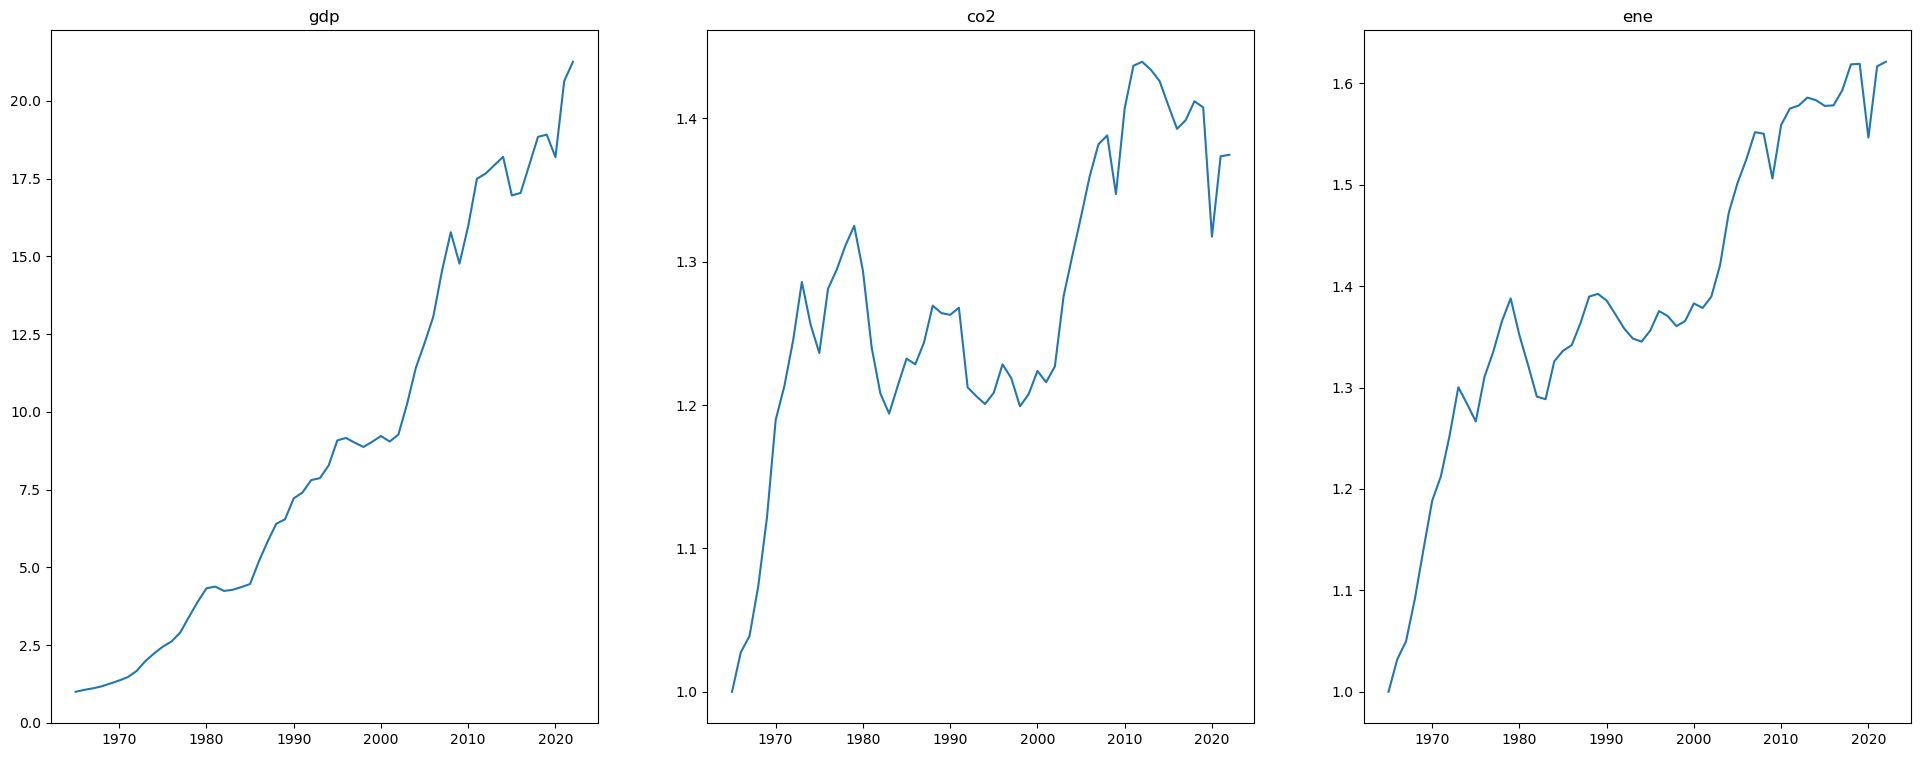

In [26]:
fig, axs = plt.subplots(1,3, figsize = (24,9))

for ke, ax in zip(allke, axs):
    ax.plot(years[-58:], norm(ke), label = ke)

    ax.set_title(ke)



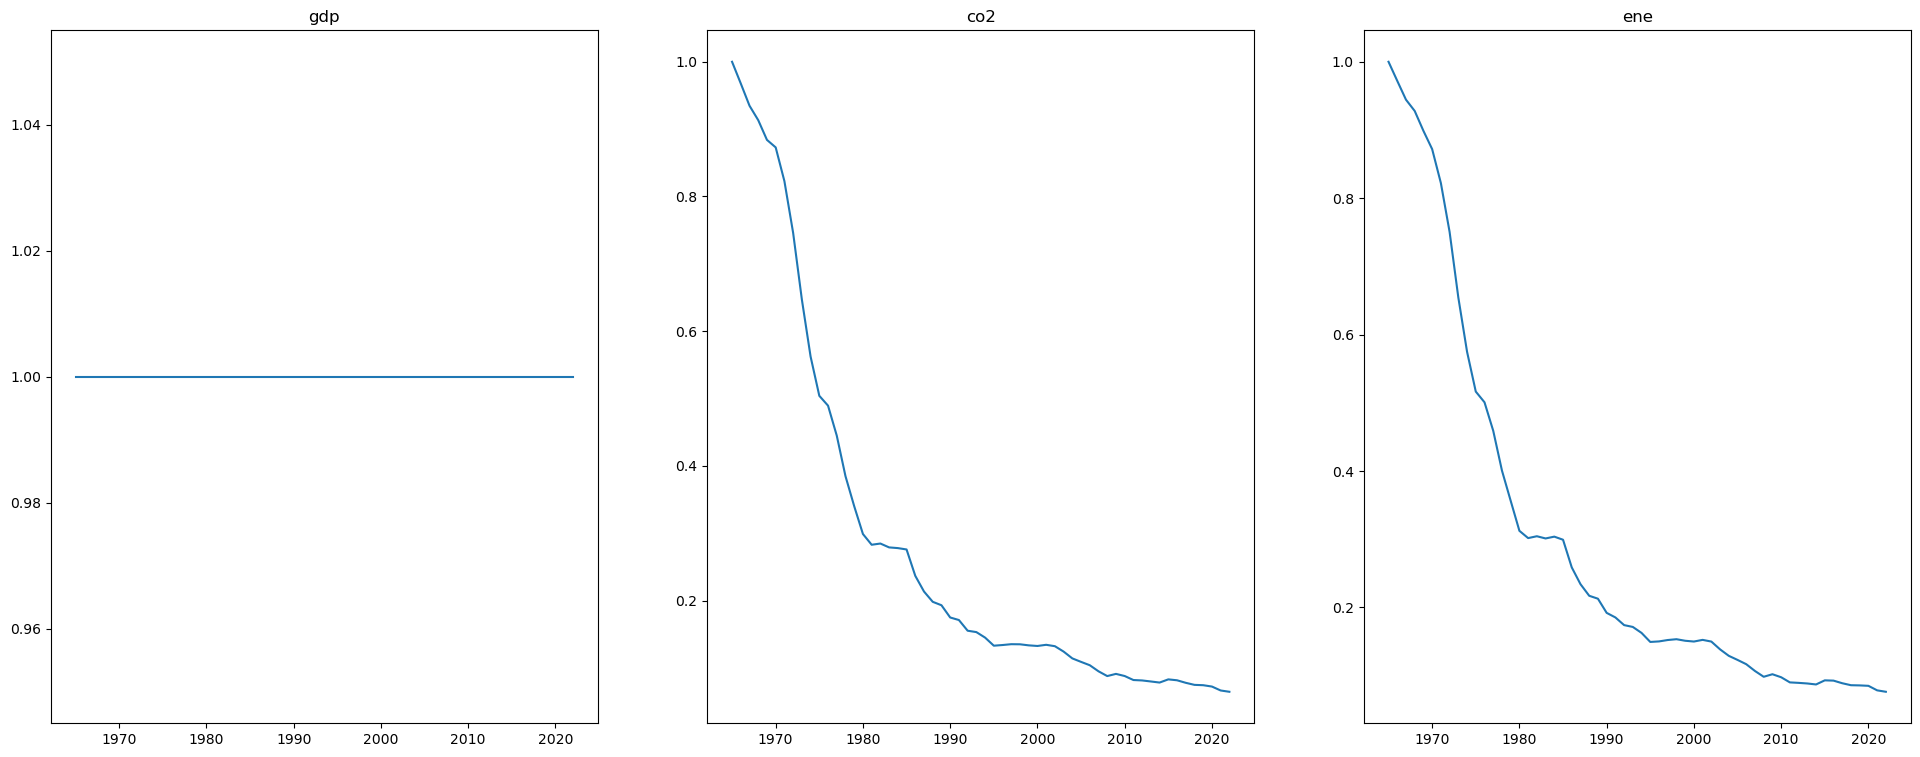

In [27]:
fig, axs = plt.subplots(1,3, figsize = (24,9))

for ke, ax in zip(allke, axs):
    ax.plot(years[-58:], norm_gdp(ke), label = ke)

    ax.set_title(ke)

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (16,9))

for ke, ax in zip(allke, axs):
    ax.plot(years[-58:], norm(ke), label = ke)

    ax.set_title(ke)